In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [21]:
df = spark.read.option("header", True).csv('/opt/gago/datasets/dataset-2.csv')

In [55]:
df = df.select(df.tempo_telefone.cast("float"), df.clientes.cast('float'))
df.printSchema()

root
 |-- tempo_telefone: float (nullable = true)
 |-- clientes: float (nullable = true)



In [56]:
df.toPandas()

,tempo_telefone,clientes
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0
5,2.883,55.0
6,4.700,88.0
7,3.600,85.0
8,1.950,51.0
9,4.350,85.0


1. Qual é o tempo médio de atendimento?
3. Qual é o desvio padrão e a variância do tempo médio de atendimento?

In [57]:
df.describe().select('*').toPandas()

,summary,tempo_telefone,clientes
0,count,272,272
1,mean,3.487783084897434,70.8970588235294
2,stddev,1.1413712535714602,13.594973789999392
3,min,1.6,43.0
4,max,5.1,96.0


2. Qual é a mediana do tempo de atendimento?
4. Quais os quartis e percentis 32, 57 e 98 do tempo de atendimento?

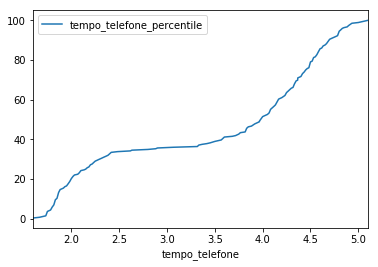

In [58]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

def calc_percent_and_percentile(df, col):
    w = Window.partitionBy().orderBy(col)

    total = df.count()
    
    return (df.groupBy(col).count()
        .withColumn(f'{col}_percent', F.udf(lambda cnt: cnt*100/total)('count'))
        .withColumn(f'{col}_percentile', F.sum(f'{col}_percent').over(w))
    )

calc_percent_and_percentile(df, 'tempo_telefone').toPandas().plot.line(
    x='tempo_telefone', y='tempo_telefone_percentile');

5. Qual o intervalo interquartil do tempo de atendimento?
6. Crie um boxplot que represente as medidas anteriores

7. Calcule a covariancia entre o tempo de atendimento e o total de clientes

In [66]:
from pyspark.sql import types as T

df.stat.cov('tempo_telefone', 'clientes')

13.977807853261739

8. Calcule a Frequência Absoluta da variável tempo de atendimento

In [60]:
df.groupBy('tempo_telefone').count().orderBy('tempo_telefone').toPandas()

,tempo_telefone,count
0,1.600,1
1,1.667,1
2,1.700,1
3,1.733,1
4,1.750,6
5,1.783,2
6,1.800,4
7,1.817,3
8,1.833,7
9,1.850,2


9. Crie um histograma que represente sua resposta no item anterior

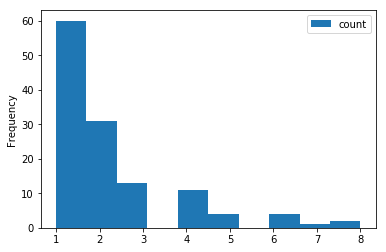

In [61]:
df.groupBy('tempo_telefone').count().orderBy('tempo_telefone').toPandas().plot.hist(
    x='tempo_telefone', y='count', bins=10);

In [62]:
# pq aparece valor em 6,7,8 sendo que o maximo no dataset é 5.1?

10. Calcule a frequencia relativa e acumulada da variavel tempo de atendimento.

11. Crie um gráfico de linha para a frequência acumulada

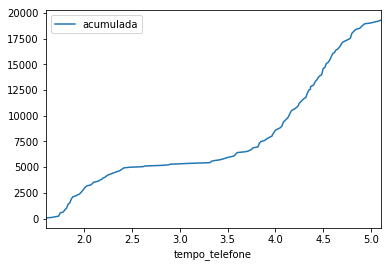

In [72]:
(df.groupBy('tempo_telefone').sum('clientes').orderBy('tempo_telefone')
 .withColumn('acumulada', F.sum('sum(clientes)').over(Window.partitionBy().orderBy('tempo_telefone')))
 .toPandas().plot.line(x='tempo_telefone', y='acumulada'));

12. Crie um gráfico de dispersão para representar a relação entre as duas variáveis no dataset

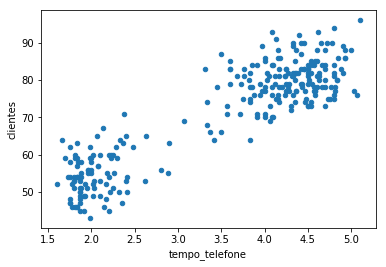

In [73]:
df.toPandas().plot.scatter(x='tempo_telefone', y='clientes')